In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder

In [39]:
df = pd.read_csv('Dataset_analyse.csv')

In [40]:
df

,title,year,director,country,duration,genre,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,casting,budget,lang,visa,award
0,rien ne va plus,1997,claude chabrol,france,6300,thriller,238507.8,172230,124628.8,3,458125,234,3.24,3.0,"[""Michel Serrault"", ""Isabelle Huppert"", ""Franç...",131200000.0,"[""francais"", ""hongrois""]",90016,0
1,la fille sur le pont,1999,patrice leconte,france,5400,drame,34301.6,154881,238497.8,5,663390,198,3.40,3.6,"[""Vanessa Paradis"", ""Daniel Auteuil"", ""Claude ...",990000000.0,"[""francais""]",90876,1
2,grosse fatigue,1994,michel blanc,france,5220,comedie,189874.2,417021,933258.2,2,2015230,189,3.34,2.7,"[""Michel Blanc"", ""Philippe Noiret"", ""Marie-Ann...",129400000.0,"[""francais""]",82266,1
3,braveheart,1995,mel gibson,etatsunis,9900,aventure action,32990.8,355642,228501.8,3,1231534,302,2.60,4.2,"[""Mel Gibson"", ""Sophie Marceau"", ""Catherine Mc...",72000000.0,"[""anglais""]",88091,9
4,regarde les hommes tomber,1994,jacques audiard,france,6600,thriller,177731.4,39739,824721.4,10,218831,46,3.06,3.3,"[""Jean-Louis Trintignant"", ""Mathieu Kassovitz""...",48658000.0,"[""francais""]",84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,be happy,2008,mike leigh,grandebretagne,7080,comedie,18126.0,110442,90372.0,9,362884,128,3.90,2.7,"[""Sally Hawkins"", ""Alexis Zegerman"", ""Andrea R...",44600000.0,"[""anglais""]",121057,1
2203,m butterfly,1993,david cronenberg,etatsunis,6060,drame,170550.2,32351,436355.2,10,101680,44,3.70,3.6,"[""Jeremy Irons"", ""John Lone"", ""Barbara Sukowa""...",71262750.8,"[""anglais""]",-1,0
2204,petits freres,1999,jacques doillon,france,5520,drame,176222.8,51749,596706.6,14,176880,-1,3.90,2.7,"[""Stephanie Touly"", ""Iliès Sefraoui"", ""Mustaph...",182000000.0,"[""francais""]",-1,0
2205,cookies fortune,1999,robert altman,etatsunis,7080,comedie,274642.4,63249,723909.4,13,239473,-1,3.80,3.3,"[""Glenn Close"", ""Julianne Moore"", ""Liv Tyler"",...",207600000.0,"[""anglais""]",97081,0


# Vision Macro

In [4]:
df.columns

Index(['title', 'year', 'director', 'country', 'duration', 'genre',
       'first_day', 'first_week', 'first_weekend', 'hebdo_rank',
       'total_spectator', 'copies', 'rating_press', 'rating_public', 'casting',
       'budget', 'lang', 'visa', 'award'],
      dtype='object')

In [41]:
df

,title,year,director,country,duration,genre,first_day,first_week,first_weekend,hebdo_rank,total_spectator,copies,rating_press,rating_public,casting,budget,lang,visa,award
0,rien ne va plus,1997,claude chabrol,france,6300,thriller,238507.8,172230,124628.8,3,458125,234,3.24,3.0,"[""Michel Serrault"", ""Isabelle Huppert"", ""Franç...",131200000.0,"[""francais"", ""hongrois""]",90016,0
1,la fille sur le pont,1999,patrice leconte,france,5400,drame,34301.6,154881,238497.8,5,663390,198,3.40,3.6,"[""Vanessa Paradis"", ""Daniel Auteuil"", ""Claude ...",990000000.0,"[""francais""]",90876,1
2,grosse fatigue,1994,michel blanc,france,5220,comedie,189874.2,417021,933258.2,2,2015230,189,3.34,2.7,"[""Michel Blanc"", ""Philippe Noiret"", ""Marie-Ann...",129400000.0,"[""francais""]",82266,1
3,braveheart,1995,mel gibson,etatsunis,9900,aventure action,32990.8,355642,228501.8,3,1231534,302,2.60,4.2,"[""Mel Gibson"", ""Sophie Marceau"", ""Catherine Mc...",72000000.0,"[""anglais""]",88091,9
4,regarde les hommes tomber,1994,jacques audiard,france,6600,thriller,177731.4,39739,824721.4,10,218831,46,3.06,3.3,"[""Jean-Louis Trintignant"", ""Mathieu Kassovitz""...",48658000.0,"[""francais""]",84098,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,be happy,2008,mike leigh,grandebretagne,7080,comedie,18126.0,110442,90372.0,9,362884,128,3.90,2.7,"[""Sally Hawkins"", ""Alexis Zegerman"", ""Andrea R...",44600000.0,"[""anglais""]",121057,1
2203,m butterfly,1993,david cronenberg,etatsunis,6060,drame,170550.2,32351,436355.2,10,101680,44,3.70,3.6,"[""Jeremy Irons"", ""John Lone"", ""Barbara Sukowa""...",71262750.8,"[""anglais""]",-1,0
2204,petits freres,1999,jacques doillon,france,5520,drame,176222.8,51749,596706.6,14,176880,-1,3.90,2.7,"[""Stephanie Touly"", ""Iliès Sefraoui"", ""Mustaph...",182000000.0,"[""francais""]",-1,0
2205,cookies fortune,1999,robert altman,etatsunis,7080,comedie,274642.4,63249,723909.4,13,239473,-1,3.80,3.3,"[""Glenn Close"", ""Julianne Moore"", ""Liv Tyler"",...",207600000.0,"[""anglais""]",97081,0


In [6]:
df.dtypes

title               object
year                 int64
director            object
country             object
duration             int64
genre               object
first_day          float64
first_week           int64
first_weekend      float64
hebdo_rank           int64
total_spectator      int64
copies               int64
rating_press       float64
rating_public      float64
casting             object
budget             float64
lang                object
visa                 int64
award                int64
dtype: object

# Country

In [7]:
# denombrage du nombre de films par pays 

resultat = df.country.value_counts()
print(resultat)

country
etatsunis          1291
france              734
grandebretagne       83
canada               15
espagne              15
japon                14
chine                11
allemagne             8
italie                7
australie             7
belgique              5
danemark              4
nouvellezelande       2
irlande               2
bresil                2
mexique               2
suisse                1
autriche              1
argentine             1
taiwan                1
serbie                1
Name: count, dtype: int64


In [43]:
# Encodage des pays 

country = ['etatsunis', 'france', 'grandebretagne', 'canada', 'espagne', 'japon', 'chine', 'allemagne', 'italie', 'australie', 'belgique',
           'danemark', 'nouvellezelande', 'irlande', 'bresil', 'mexique', 'suisse', 'autriche', 'argentine', 'taiwan', 'serbie']


label_encoder = LabelEncoder()

col_country = label_encoder.fit_transform(df['country'])

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
# col_country = pd.get_dummies(df['country'])

# Affichons le résultat
col_country

array([11, 11, 11, ..., 11, 10,  0])

KeyError: 'col_country'

In [9]:
encoder = LabelEncoder()
encoder.fit_transform(df[country])

KeyError: "None of [Index(['etatsunis', 'france', 'grandebretagne', 'canada', 'espagne', 'japon',\n       'chine', 'allemagne', 'italie', 'australie', 'belgique', 'danemark',\n       'nouvellezelande', 'irlande', 'bresil', 'mexique', 'suisse', 'autriche',\n       'argentine', 'taiwan', 'serbie'],\n      dtype='object')] are in the [columns]"

# Langue

In [10]:
# étude différentes langues d'origine ou de traduction
resultat = df.lang.value_counts()
resultat

lang
["anglais"]                                                 1157
["francais"]                                                 606
["anglais", "francais"]                                       60
["anglais", "espagnol"]                                       40
["anglais", "allemand"]                                       24
                                                            ... 
["arabic", "anglais", "allemand", "italien"]                   1
["allemand", "russe"]                                          1
["anglais", "francais", "allemand", "russe", "espagnol"]       1
["arabic", "anglais", "hebreu", "espagnol"]                    1
["bosniaque", "anglais", "russe", "serbe"]                     1
Name: count, Length: 175, dtype: int64

In [11]:
# encodage du principaux genre de films 

lang =

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
col_lang = pd.get_dummies(df['lang'])

# Affichons le résultat
col_lang

SyntaxError: invalid syntax (3468359751.py, line 3)

# director

In [24]:
# étude réalisateur, directeur du film 

resultat = df.director.value_counts()
resultat

director
woody allen          28
clint eastwood       22
steven spielberg     21
steven soderbergh    19
francois ozon        17
                     ..
joss whedon           1
michael cimino        1
edouard molinaro      1
todd solondz          1
yves robert           1
Name: count, Length: 358, dtype: int64

In [ ]:
# principaux directeur ou realisateur


In [28]:
# encodage des principaux réalisateur  

realisateur =['woody allen', 'clint eastwood', 'steven spielberg', 'steven soderbergh', 'françois ozon'] 

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
col_realisateur = pd.get_dummies(df['realisateur'])

# Affichons le résultat
col_realisateur

KeyError: 'realisateur'

In [34]:
director = df[df['director'] == 'woody allen' ]

print(director)

KeyError: 'director'

# Genre

In [12]:
# étude du genre 

resultat = df.genre.value_counts()
print(resultat)

genre
comedie               514
drame                 467
thriller              273
aventure action       268
comedie dramatique    126
science fiction        99
romance                76
fantasy                71
animation              62
comicbook              58
film familial          54
horreur                51
guerre                 27
western                19
musical                14
documentaire           13
peplum                  7
catastrophe             7
courtmetrage            1
Name: count, dtype: int64


In [13]:
# encodage des principaux genres de films 

genre = ['comedie', 'drame', 'thriller', 'aventure action', 'comedie dramatique', 'science fiction', 'romance', 'fantasy', 'animation', 'comicbook', 'film familial',
            'horreur', 'guerre', 'western', 'musical', 'documentaire', 'peplum', 'catastrophe', 'courmetrage']

# Utilisons la méthode 'get_dummies' de pandas pour effectuer le one-hot encoding
col_genre = pd.get_dummies(df['genre'])

# Affichons le résultat
col_genre 

,animation,aventure action,catastrophe,comedie,comedie dramatique,comicbook,courtmetrage,documentaire,drame,fantasy,film familial,guerre,horreur,musical,peplum,romance,science fiction,thriller,western
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2202,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2203,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2204,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2205,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Organisation des Features

In [27]:
# Suppression des colonnes
df = df.drop(['title', 'director', 'country', 'genre', 'casting', 'lang'], axis=1)

In [26]:
# Observation
df.columns

Index(['title', 'year', 'director', 'country', 'duration', 'genre',
       'first_day', 'first_week', 'first_weekend', 'hebdo_rank',
       'total_spectator', 'copies', 'rating_press', 'rating_public', 'casting',
       'budget', 'lang', 'visa', 'award'],
      dtype='object')

In [28]:
# implémentation des colonnes encodées 


KeyError: 'col_genre'

# Matrice de correlation 

<Axes: >

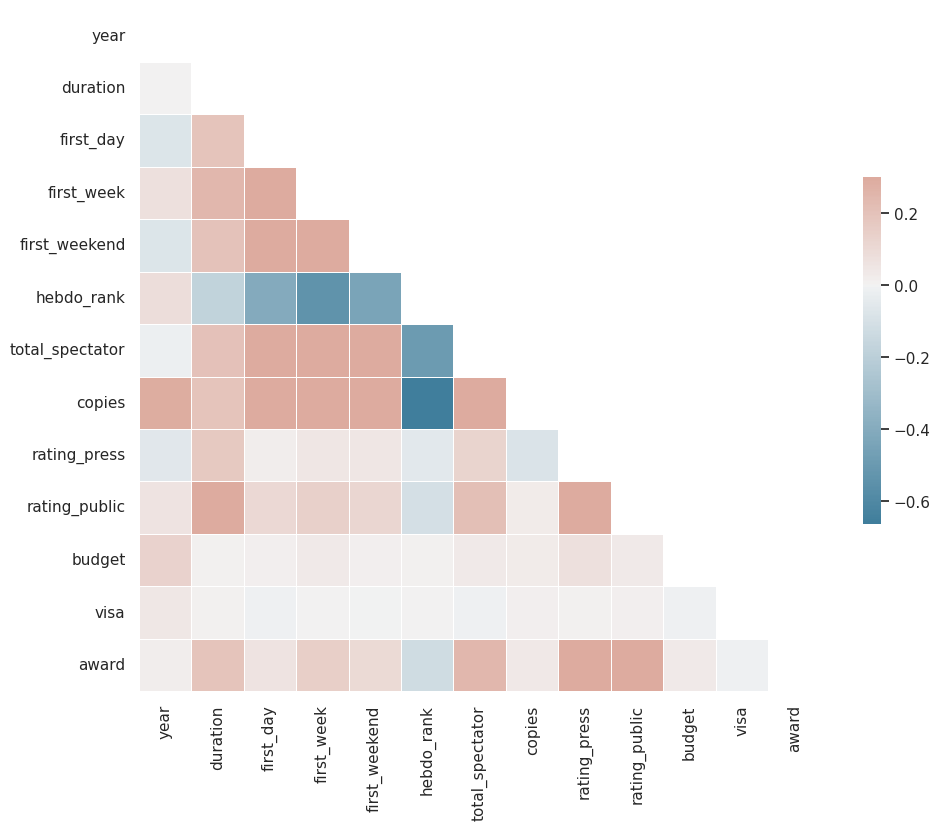

In [8]:
sns.set_theme(style='white')

# Calculer matrice de correlation 
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration de matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Affichage de couleur 
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Générer matrice de correlation
sns.heatmap(corr,mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths= .5, cbar_kws={"shrink": .5})

array([[<Axes: xlabel='total_spectator', ylabel='total_spectator'>,
        <Axes: xlabel='rating_public', ylabel='total_spectator'>,
        <Axes: xlabel='award', ylabel='total_spectator'>,
        <Axes: xlabel='copies', ylabel='total_spectator'>,
        <Axes: xlabel='budget', ylabel='total_spectator'>],
       [<Axes: xlabel='total_spectator', ylabel='rating_public'>,
        <Axes: xlabel='rating_public', ylabel='rating_public'>,
        <Axes: xlabel='award', ylabel='rating_public'>,
        <Axes: xlabel='copies', ylabel='rating_public'>,
        <Axes: xlabel='budget', ylabel='rating_public'>],
       [<Axes: xlabel='total_spectator', ylabel='award'>,
        <Axes: xlabel='rating_public', ylabel='award'>,
        <Axes: xlabel='award', ylabel='award'>,
        <Axes: xlabel='copies', ylabel='award'>,
        <Axes: xlabel='budget', ylabel='award'>],
       [<Axes: xlabel='total_spectator', ylabel='copies'>,
        <Axes: xlabel='rating_public', ylabel='copies'>,
        <Ax

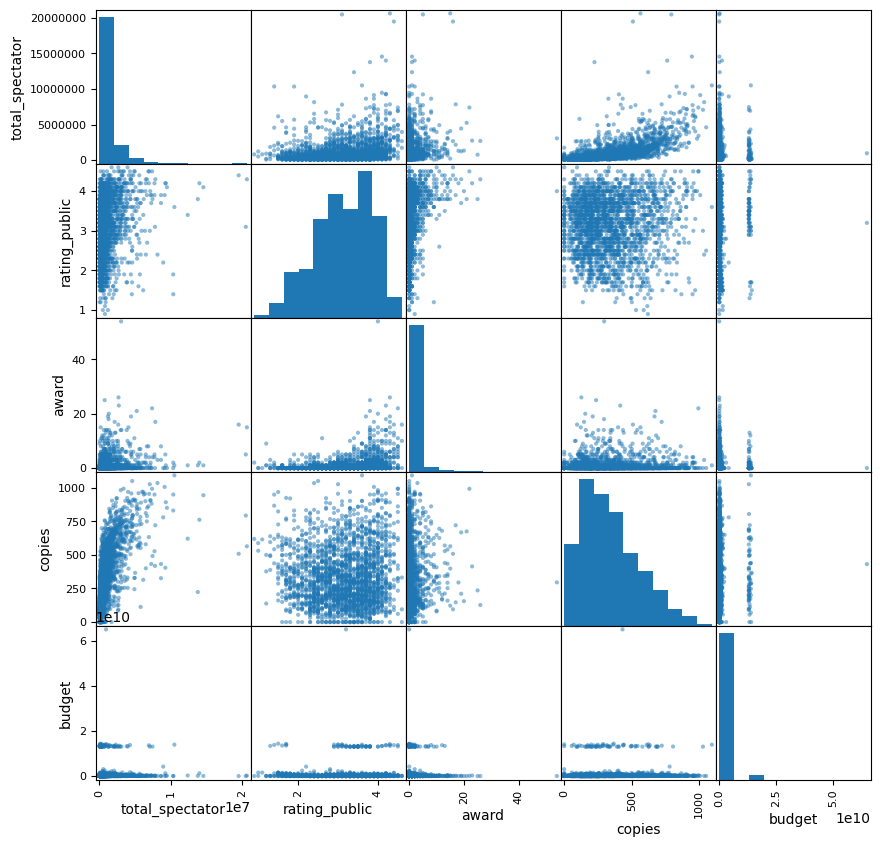

In [30]:
features  = df[['total_spectator', 'rating_public', 'award', 'copies', 'budget']]

scatter_matrix(features, figsize=(10,10))

# Budget

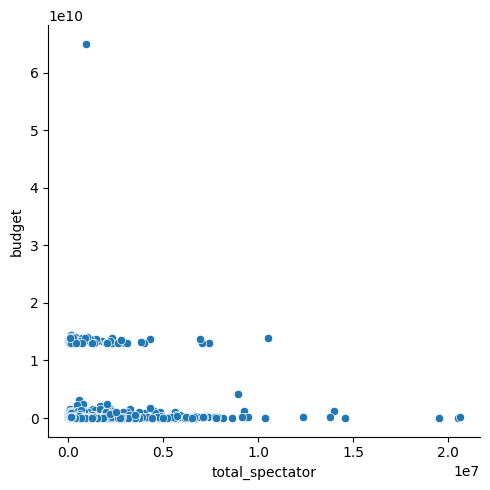

In [23]:
sns.relplot(x="total_spectator", y="budget", data=df,
            kind="scatter")
plt.show()

# Award

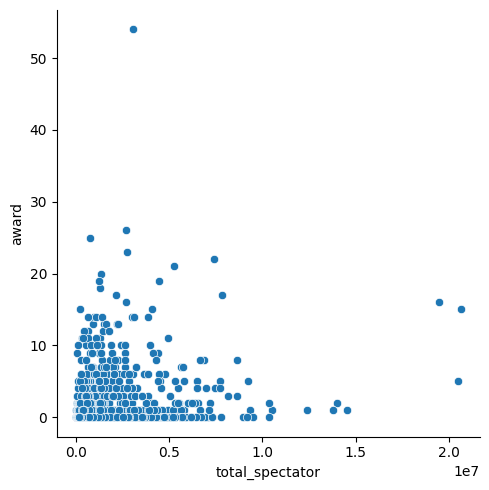

In [25]:
sns.relplot(x="total_spectator", y="award", data=df,
            kind="scatter")
plt.show()

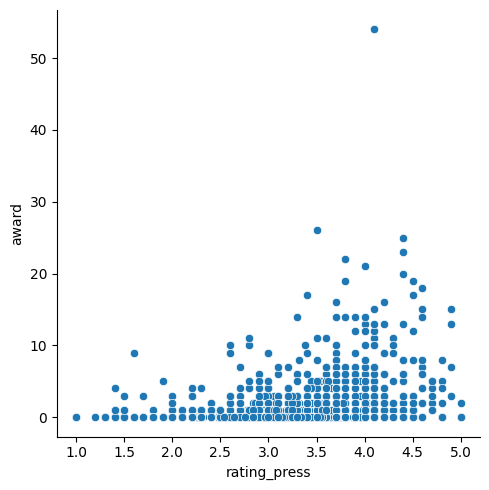

In [10]:
sns.relplot(x="rating_press", y="award", data=df,
            kind="scatter")
plt.show()

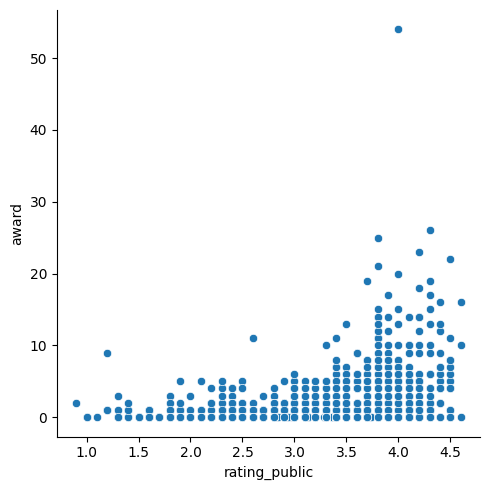

In [12]:
sns.relplot(x="rating_public", y="award", data=df,
            kind="scatter")
plt.show()

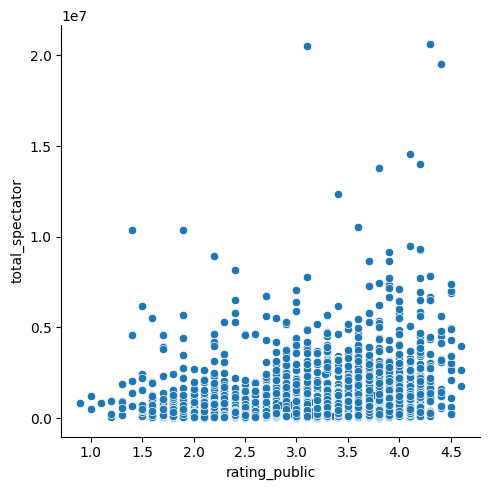

In [15]:
sns.relplot(x="rating_public", y="total_spectator", data=df,
            kind="scatter")
plt.show()

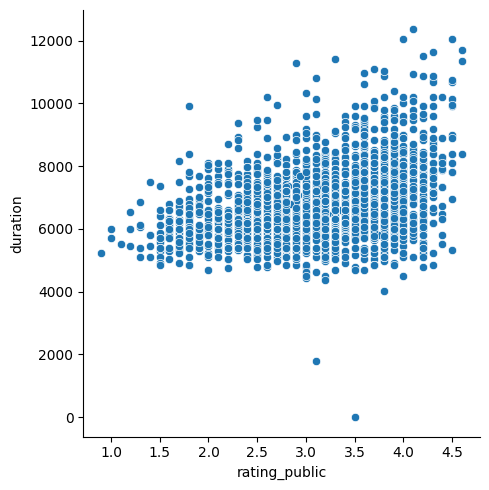

In [16]:
sns.relplot(x="rating_public", y="duration", data=df,
            kind="scatter")
plt.show()

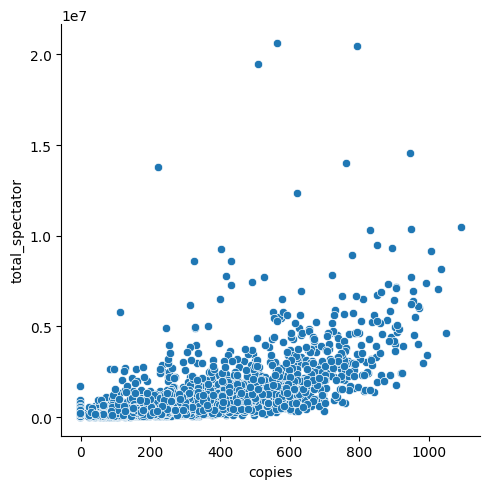

In [17]:
sns.relplot(x="copies", y="total_spectator", data=df,
            kind="scatter")
plt.show()